<a href="https://colab.research.google.com/github/Nuranisah05/Machine_Learning_2025/blob/main/Latihan12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (8, 6)
# plt.style.use('ggplot')
import seaborn as sns




In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum12"

In [15]:
# Memanggil dan mencetak dataset
df = pd.read_csv(path + '/data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
data = df.iloc[:, 1:-1]

variables = data.iloc[:, 1:]
labels = data.iloc[:, 0]

In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [19]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
# For illustration purposes
data_visualization = data.iloc[:, [0, 1, 2, 3, 4, 14, 21, 22, 23, 24]]

In [27]:
# Distribusi kelas diagnosis
print("Nama Kelas:", df['diagnosis'].unique())
df['diagnosis'].value_counts()

Nama Kelas: ['M' 'B']


,count
diagnosis,
B,357
M,212


In [31]:
# Pemisah Fitur (X) dan label (y)
# fitur dan label
X = variables
y = labels

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (569, 30)
Shape y: (569,)


In [33]:
#Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
# print("Shape y_train:", y_train.shape)
# print("Shape y_test:", y_test.shape)

Shape X_train: (455, 30)
Shape X_test: (114, 30)


In [34]:
# Standarisasi (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 5.18558727e-01,  8.91825791e-01,  4.24631702e-01,
         3.83925436e-01, -9.74743706e-01, -6.89771505e-01,
        -6.88586446e-01, -3.98175254e-01, -1.03915470e+00,
        -8.25056321e-01, -1.09317755e-01, -5.59755400e-02,
        -2.10096206e-01, -1.59132582e-02, -1.00518399e+00,
        -9.11941990e-01, -6.62815884e-01, -6.52561081e-01,
        -7.01889114e-01, -2.75393571e-01,  5.79797697e-01,
         1.31324246e+00,  4.66908134e-01,  4.45982711e-01,
        -5.96154777e-01, -6.34722227e-01, -6.10227299e-01,
        -2.35743918e-01,  5.45663235e-02,  2.18367276e-02],
       [-5.16364088e-01, -1.63971029e+00, -5.41348716e-01,
        -5.42961327e-01,  4.76219058e-01, -6.31833818e-01,
        -6.04281166e-01, -3.03074908e-01,  5.21543093e-01,
        -4.54522896e-01, -6.04377961e-01, -1.00104604e+00,
        -5.85429002e-01, -4.93453793e-01,  4.03212009e-01,
        -7.68173276e-01, -4.79187222e-01,  1.14508478e-01,
        -1.42950761e-01, -5.77397732e-01, -5.82458953e-

In [52]:
# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

print("\nClassifiction Report (Tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=labels.unique()))

Akurasi SVM tanpa PCA: 0.9736842105263158

Classifiction Report (Tanpa PCA):
              precision    recall  f1-score   support

           M       0.96      1.00      0.98        72
           B       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [58]:
PCA = PCA(n_components=2)
X_train_pca = PCA.fit_transform(X_train_scaled)
X_test_pca = PCA.transform(X_test_scaled)

print("Shape X_train_pca:", X_train)

Shape X_train_pca:      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
10         16.02         23.24          102.70      797.8          0.08206   
170        12.32         12.39           78.85      464.1          0.10280   
407        12.85         21.37           82.63      514.5          0.07551   
430        14.90         22.53          102.10      685.0          0.09947   
27         18.61         20.25          122.10     1094.0          0.09440   
..           ...           ...             ...        ...              ...   
37         13.03         18.42           82.61      523.8          0.08983   
415        11.89         21.17           76.39      433.8          0.09773   
458        13.00         25.13           82.61      520.2          0.08369   
476        14.20         20.53           92.41      618.4          0.08931   
335        17.06         21.00          111.80      918.6          0.11190   

     compactness_mean  concavity_mean  conca

In [59]:
# Variasi yang dijelaskan oleh tiap komponen
explained_variance = PCA.explained_variance_ratio_
print("Variasi yang dhelaskan oleh tiap komponen:", explained_variance)
print("Total Variasi yang Dijelaskan 2 Komponen Utama:", explained_variance.sum())

Variasi yang dhelaskan oleh tiap komponen: [0.44593522 0.18545255]
Total Variasi yang Dijelaskan 2 Komponen Utama: 0.631387776559559


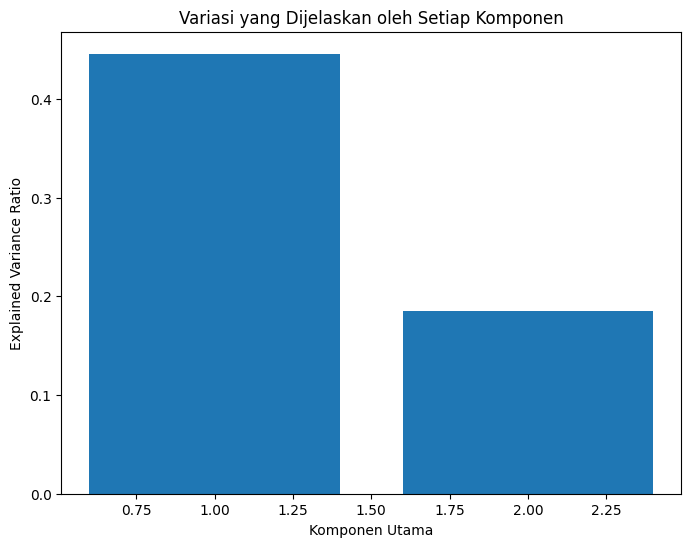

In [60]:
plt.bar([1, 2], explained_variance)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variasi yang Dijelaskan oleh Setiap Komponen')
plt.show()

In [62]:
# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (2 Komponen):", acc_pca)

print("\nClassifiction Report (PCA):")
print(classification_report(y_test, y_pred_pca, target_names=labels.unique()))

Akurasi SVM dengan PCA (2 Komponen): 0.9298245614035088

Classifiction Report (PCA):
              precision    recall  f1-score   support

           M       0.91      0.99      0.95        72
           B       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



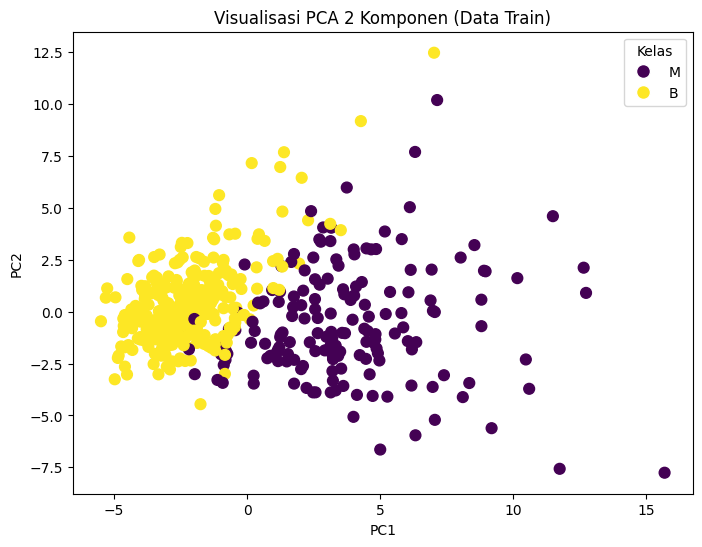

In [65]:
# Map 'M' and 'B' to numerical values for coloring
y_train_numeric = y_train.map({'M': 0, 'B': 1})

# Visualisasi PCA 2 Komponen (menggunakan data train)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111) # Changed to 2D plot as PCA has 2 components

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train_numeric,  # Use numeric labels for coloring
    cmap='viridis',     # Specify a colormap
    s=60
)

ax.set_title('Visualisasi PCA 2 Komponen (Data Train)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Create custom legend handles and labels
unique_labels = y_train.unique()
label_to_numeric = {'M': 0, 'B': 1} # Ensure consistent mapping
numeric_to_label = {v: k for k, v in label_to_numeric.items()}

numeric_classes = sorted(y_train_numeric.unique())
colors = [plt.cm.viridis(scatter.norm(nc)) for nc in numeric_classes]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=numeric_to_label[nc],
                            markerfacecolor=color, markersize=10)
                  for nc, color in zip(numeric_classes, colors)]

ax.legend(handles=legend_handles, title="Kelas")

plt.show()

In [66]:
# Membandingkan hasil model tanpa PCA
comparison = pd.DataFrame({
    'Metode': ['SVM Tanpa PCA', 'SVM dengan PCA (2 Komponen)'],
    'Jumlah Fitur': [X.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variasi Total PCA': [None, explained_variance.sum()]
})

comparison

,Metode,Jumlah Fitur,Akurasi,Variasi Total PCA
0,SVM Tanpa PCA,30,0.973684,NaN
1,SVM dengan PCA (2 Komponen),2,0.929825,0.631388


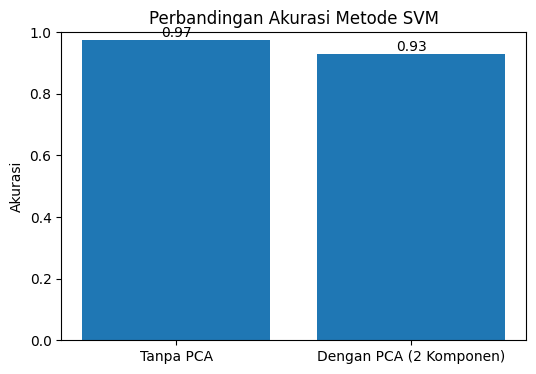

In [67]:
# Visualisasi Grafik
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (2 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Metode SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()